###Pretraining Task using Patch Prediction


In [ ]:
#Importing Libraries
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models, losses, optimizers
from tensorflow.keras.datasets import cifar10

In [ ]:
# Define a simple CNN for patch prediction
model = models.Sequential([
    layers.Conv2D(16, (3, 3), activation='relu', input_shape=(8, 8, 3)),
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(192, activation='relu'),
    layers.Reshape((8, 8, 3))
])

In [ ]:
# Define a self-supervised task: predicting a patch from an image
def self_supervised_task(image):
    h, w = image.shape[0], image.shape[1]
    patch_size = 8
    i = np.random.randint(0, h - patch_size)
    j = np.random.randint(0, w - patch_size)
    patch = image[i:i+patch_size, j:j+patch_size].copy()
    return patch

# Define the custom dataset
def generate_self_supervised_data(base_dataset):
    patches = []
    for image in base_dataset:
        patch = self_supervised_task(image)
        patches.append(patch)
    return np.array(patches)

In [ ]:

# Load the CIFAR-10 dataset and create self-supervised data
(x_train, _), (_, _) = cifar10.load_data()
self_supervised_data = generate_self_supervised_data(x_train)

# Normalize and prepare data for training
self_supervised_data = self_supervised_data / 255.0

# Compile the model
model.compile(optimizer='adam', loss=losses.MeanSquaredError())

# Train the model
model.fit(self_supervised_data, self_supervised_data, epochs=10, batch_size=64)

# After training, the model can be used for patch prediction on new data


Epoch 1/10
782/782 [==============================] - 4s 3ms/step - loss: 0.0091
Epoch 2/10
782/782 [==============================] - 3s 3ms/step - loss: 0.0011
Epoch 3/10
782/782 [==============================] - 3s 4ms/step - loss: 7.0220e-04
Epoch 4/10
782/782 [==============================] - 3s 4ms/step - loss: 5.0649e-04
Epoch 5/10
782/782 [==============================] - 3s 4ms/step - loss: 3.9983e-04
Epoch 6/10
782/782 [==============================] - 3s 4ms/step - loss: 3.3263e-04
Epoch 7/10
782/782 [==============================] - 3s 4ms/step - loss: 2.8549e-04
Epoch 8/10
782/782 [==============================] - 3s 3ms/step - loss: 2.4148e-04
Epoch 9/10
782/782 [==============================] - 3s 3ms/step - loss: 2.1699e-04
Epoch 10/10
782/782 [==============================] - 3s 3ms/step - loss: 1.9286e-04


In [ ]:
import numpy as np

# Load a new image for prediction

new_image = x_train[0]

# Define the self-supervised task for prediction
def self_supervised_task_prediction(image):
    h, w = image.shape[0], image.shape[1]
    patch_size = 8
    i = np.random.randint(0, h - patch_size)
    j = np.random.randint(0, w - patch_size)
    patch = image[i:i+patch_size, j:j+patch_size].copy()
    return patch

In [ ]:
# Generate a patch for prediction
patch_to_predict = self_supervised_task_prediction(new_image)
patch_to_predict = np.expand_dims(patch_to_predict, axis=0)  # Add batch dimension
patch_to_predict = patch_to_predict / 255.0  # Normalize

# Make a prediction
predicted_patch = model.predict(patch_to_predict)

1/1 [==============================] - 0s 61ms/step


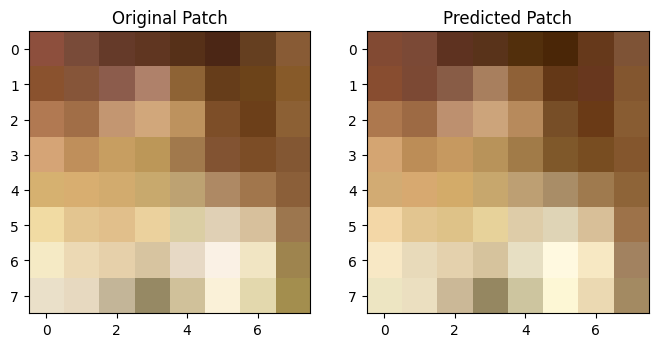

In [ ]:
# Display the results (for demonstration)
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 4))

plt.subplot(1, 2, 1)
plt.title('Original Patch')
plt.imshow(patch_to_predict[0])

plt.subplot(1, 2, 2)
plt.title('Predicted Patch')
plt.imshow(predicted_patch[0])

plt.show()